<h1>WeatherPy</h1>

![](weather_map.jpg)

<h2> Table of contents</h2>
1. Introduction<br>
2. Generate random list for latitudes and longitudes
3. Locate Nearest City
4. Generate Dataframe for all latitudes and longitudes
6. Use Openweathermap API
7. Scatter Plots and Tables
9. Conclusion

<h3><u>Instructions</u></h3>


In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must use Matplotlib to create your plots.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

<h3><u>Import libraries</u></h3>

In [1]:
import pandas as pd
from citipy import citipy
import numpy as np
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h3><u>Generate random list for latitudes and longitudes</u></h3>

In [2]:
#generate random list for latitudes and longitudes 

latitude = []
longitude = []

for each_lat in np.random.randint(-90,90,2000):
    latitude.append(each_lat)

for each_lon in np.random.randint(-180,180,2000):
    longitude.append(each_lon)
    

In [3]:
#Create and variable called latitude_and_Longitude and store all random latitudes and longitudes generated

latitude_and_Longitude = tuple(zip(latitude,longitude))

<h3><u>Locate Nearest City</u></h3>

In [4]:
#use citipy library to find the nearest city for all latitudes and longitudes

cities = []
country = []

for lat,lon in latitude_and_Longitude:
    city = citipy.nearest_city(lat,lon)
    
    cityName = city.city_name
    
    cities.append(cityName)
    
    country.append(city.country_code)
    
    

In [5]:
#Print out how many the different cities were generated

print('The above script has generated {} different cities using random numbers.'.format(len(set(cities))))

The above script has generated 747 different cities using random numbers.


<h3><u>Generate Dataframe for all latitudes and longitudes</u></h3>

In [6]:
#create a dataframe to store all the cities and countries generated with citipy

df_countries = pd.DataFrame({'Cities': cities,
              'Country': country})

#add additional blank columns to store information from openweathermap api

df_countries['Latitude'] = ''
df_countries['Longitude'] = ''
df_countries['Temperature (F)'] = ''
df_countries['Humidity (%)'] = ''
df_countries['Cloudiness (%)'] = ''
df_countries['Wind Speed (mph)'] = ''

In [7]:
#drop all duplicates in column Cities.

df_countries = df_countries.drop_duplicates(subset=['Cities'],keep='first')

In [8]:
#api key used with openweathermap api

api_key = "5be78fade1727ace968b5ab363d997bd"

<h3><u>Use Openweathermap API</u></h3>

In [11]:
#loop through all rows and fill in values for blank columns in dataframe

for index,row in df_countries.iterrows():
    city_name = row['Cities']
    Country_id = row['Country']
    
    
    #api call for all Cities 
    api_url = "http://api.openweathermap.org/data/2.5/forecast" \
    "?q={},{}&units=IMPERIAL&mode=json&APPID={}".format(city_name,Country_id,api_key)
    
    
    country_info = requests.get(api_url).json()
    
    #print all api url's for each city
    print(api_url)
    
    
    try:
        df_countries.set_value(index,'Latitude',country_info['city']['coord']['lat'])
        df_countries.set_value(index,'Longitude',country_info['city']['coord']['lon'])
        df_countries.set_value(index,'Temperature (F)',country_info['list'][0]['main']['temp'])
        df_countries.set_value(index,'Humidity (%)',country_info['list'][0]['main']['humidity'])
        df_countries.set_value(index,'Cloudiness (%)',country_info['list'][0]['clouds']['all'])
        df_countries.set_value(index,'Wind Speed (mph)',country_info['list'][0]['wind']['speed'])
        
    except KeyError:
        df_countries.set_value(index,'Latitude',np.nan)
        df_countries.set_value(index,'Longitude',np.nan)
        df_countries.set_value(index,'Temperature (F)',np.nan)
        df_countries.set_value(index,'Humidity (%)',np.nan)
        df_countries.set_value(index,'Cloudiness (%)',np.nan)
        df_countries.set_value(index,'Wind Speed (mph)',np.nan)
        
        print('Missing weather information...skip')


    

http://api.openweathermap.org/data/2.5/forecast?q=mahebourg,mu&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=klaksvik,fo&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=tiarei,pf&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=east london,za&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=saskylakh,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=tarakan,id&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=nome,us&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=constitucion,mx&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab

http://api.openweathermap.org/data/2.5/forecast?q=hammerfest,no&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=puerto ayora,ec&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=nador,ma&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=torbay,ca&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=urumqi,cn&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=haines junction,ca&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=mount gambier,au&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=gobabis,na&units=IMPER

http://api.openweathermap.org/data/2.5/forecast?q=sai buri,th&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=bay city,us&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=luganville,vu&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=yerbogachen,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=vaini,to&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=chardara,kz&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=ciudad guayana,ve&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=hami,cn&units=IMPERIAL&mo

http://api.openweathermap.org/data/2.5/forecast?q=laramie,us&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=college,us&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=baykit,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=bilibino,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=bandarbeyla,so&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=severo-kurilsk,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=port augusta,au&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=panaba,mx&units=IMPERIAL&mode=json&APPID=5be78fade1727ace96

http://api.openweathermap.org/data/2.5/forecast?q=muisne,ec&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=chernyshevskiy,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=kloulklubed,pw&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=marawi,sd&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=grand river south east,mu&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=manutuke,nz&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=umba,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=nanortalik,gl&unit

http://api.openweathermap.org/data/2.5/forecast?q=saint anthony,ca&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=voyvozh,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=palana,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=atherton,au&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=gazojak,tm&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=antalaha,mg&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=lesogorskiy,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=faanui,pf&units=IMPERIAL&mode

http://api.openweathermap.org/data/2.5/forecast?q=frederiksvaerk,dk&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=camara de lobos,pt&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=meyungs,pw&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=sofiyivka,ua&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=carbonia,it&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=bereda,so&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=suoyarvi,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.

http://api.openweathermap.org/data/2.5/forecast?q=truro,ca&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=mercedes,uy&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=eenhana,na&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=chuy,uy&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=rawson,ar&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=las choapas,mx&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=harper,lr&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=ullapool,gb&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
h

http://api.openweathermap.org/data/2.5/forecast?q=normandin,ca&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=kourou,gf&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=bela vista de goias,br&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=corinto,ni&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=tambura,sd&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=beira,mz&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=soria,es&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=jiddah,sa&units=IMPERIAL&mode=j

http://api.openweathermap.org/data/2.5/forecast?q=malm,no&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=coihaique,cl&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=codrington,ag&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=mys shmidta,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=agirish,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=atar,mr&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=nizamabad,in&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=

http://api.openweathermap.org/data/2.5/forecast?q=turangi,nz&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=biloela,au&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=cessnock,au&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=samarai,pg&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=acajutla,sv&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=cananea,mx&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=kaoma,zm&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=takaka,nz&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
h

http://api.openweathermap.org/data/2.5/forecast?q=puerto castilla,hn&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=omboue,ga&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=sombrio,br&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=batalha,br&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=auki,sb&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=montepuez,mz&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=awbari,ly&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=pirovskoye,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab36

In [12]:
#change all data recieved from openweathermap api to numerical data
df_countries['Latitude'] = pd.to_numeric(df_countries['Latitude'])
df_countries['Longitude'] = pd.to_numeric(df_countries['Longitude'])
df_countries['Temperature (F)'] = pd.to_numeric(df_countries['Temperature (F)'])
df_countries['Humidity (%)'] = pd.to_numeric(df_countries['Humidity (%)'])
df_countries['Cloudiness (%)'] = pd.to_numeric(df_countries['Cloudiness (%)'])
df_countries['Wind Speed (mph)'] = pd.to_numeric(df_countries['Wind Speed (mph)'])

In [13]:
#display dataframe df_countries after openweathermap api calls 
df_countries.head()

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,mahebourg,mu,-20.4081,57.7000,79.54,81.0,64.0,7.40
1,klaksvik,fo,62.2266,-6.5891,38.75,100.0,88.0,20.04
2,tiarei,pf,-17.5334,-149.3334,81.03,100.0,76.0,21.27
3,east london,za,-33.0153,27.9116,67.93,100.0,0.0,4.05
4,saskylakh,ru,71.9167,114.0833,4.48,79.0,64.0,5.95


In [14]:
length_of_original_DF = len(df_countries)
length_after_dropna = len(df_countries.dropna())

missing_weather_info = length_of_original_DF - length_after_dropna


In [15]:
print('For the following cities associated with this dataframe, {} cities did not contain weather\
 information. These cities\t will be dropped from this dataframe.'.format(missing_weather_info))

print('\n')

print("The dataframe used for plotting contains weather information for {} different cities. "\
      .format(len(df_countries.dropna())))

For the following cities associated with this dataframe, 116 cities did not contain weather information. These cities	 will be dropped from this dataframe.


The dataframe used for plotting contains weather information for 631 different cities. 


In [16]:
df_countries = df_countries.dropna()
df_countries.to_csv(path_or_buf='df_countries.csv')

<h3><u>Scatter Plots and Tables</u></h3>

<h4>Using Scatter Plots show the relationships between the following:</h4> 
<ul>
<li>Temperature (F) vs. Latitude</li>
<li>Humidity (%) vs. Latitude</li>
<li>Cloudiness (%) vs. Latitude</li>
<li>Wind Speed (mph) vs. Latitude</li>
</ul>

In [17]:
df_countries_table = df_countries.copy()
df_countries_table['Latitude'] = pd.qcut(df_countries['Latitude'],11,precision=0)

In [18]:
cm = sns.light_palette('green',as_cmap=True)

df_countries_table.groupby(['Latitude'])['Temperature (F)'].mean().reset_index().style.background_gradient(cmap=cm)

,Latitude,Temperature (F)
0,"(-56.0, -30.0]",59.7726
1,"(-30.0, -18.0]",75.7854
2,"(-18.0, -6.0]",76.1277
3,"(-6.0, 4.0]",78.1372
4,"(4.0, 14.0]",77.5484
5,"(14.0, 24.0]",71.88
6,"(24.0, 36.0]",56.6514
7,"(36.0, 43.0]",42.0314
8,"(43.0, 53.0]",27.8674
9,"(53.0, 64.0]",21.5682


In [19]:
#plot the following plots Temperature (F) vs. Lat, Humidity (%) vs. Lat, Cloudiness (%) vs. Lat, and 
#Wind Speed (mph) vs. Lat

plt.style.use('dark_background')

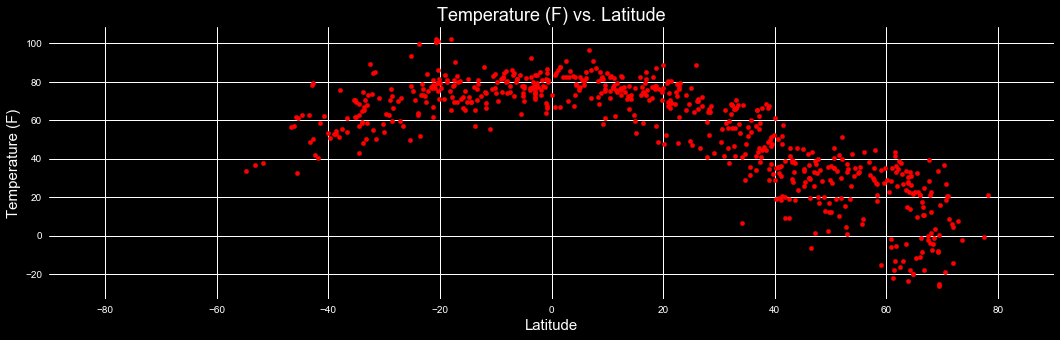

In [20]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Temperature (F)'],color = 'red',s=20)
plt.title('Temperature (F) vs. Latitude',fontsize=(18));
plt.xlim(-90,90)
plt.ylabel('Temperature (F)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

In [21]:
df_countries_table.groupby(['Latitude'])['Humidity (%)'].mean().reset_index().style.background_gradient(cmap=cm)

,Latitude,Humidity (%)
0,"(-56.0, -30.0]",77.9655
1,"(-30.0, -18.0]",73.0702
2,"(-18.0, -6.0]",90.0351
3,"(-6.0, 4.0]",91.7931
4,"(4.0, 14.0]",85.8246
5,"(14.0, 24.0]",78.8947
6,"(24.0, 36.0]",80.2807
7,"(36.0, 43.0]",79.431
8,"(43.0, 53.0]",84.1053
9,"(53.0, 64.0]",87.7544


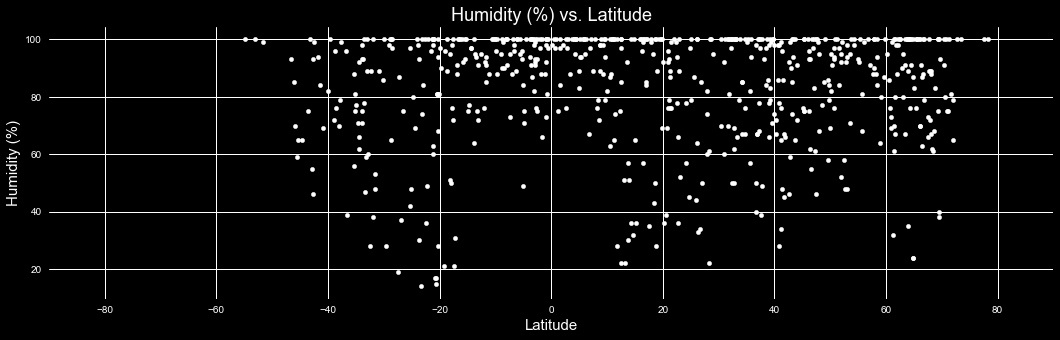

In [22]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Humidity (%)'],color = 'white',s=20);
plt.title('Humidity (%) vs. Latitude',fontsize=(18));
plt.xlim(-90,90)
plt.ylabel('Humidity (%)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

In [23]:
df_countries_table.groupby(['Latitude'])['Cloudiness (%)'].mean().reset_index().style.background_gradient(cmap=cm)

,Latitude,Cloudiness (%)
0,"(-56.0, -30.0]",27.6552
1,"(-30.0, -18.0]",37.193
2,"(-18.0, -6.0]",53.4035
3,"(-6.0, 4.0]",40.8966
4,"(4.0, 14.0]",51.0175
5,"(14.0, 24.0]",34.8772
6,"(24.0, 36.0]",24.5614
7,"(36.0, 43.0]",38.6897
8,"(43.0, 53.0]",44.0702
9,"(53.0, 64.0]",65.7544


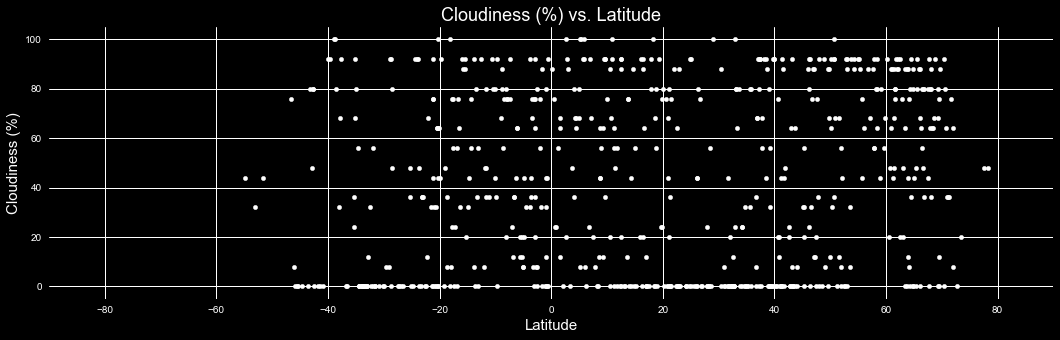

In [24]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Cloudiness (%)'],color = 'w',s=20);
plt.title('Cloudiness (%) vs. Latitude',fontsize=(18));
plt.xlim(-90,90)
plt.ylabel('Cloudiness (%)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

In [25]:
df_countries_table.groupby(['Latitude'])['Wind Speed (mph)'].mean().reset_index().style.background_gradient(cmap=cm)

,Latitude,Wind Speed (mph)
0,"(-56.0, -30.0]",9.76466
1,"(-30.0, -18.0]",9.6293
2,"(-18.0, -6.0]",7.60211
3,"(-6.0, 4.0]",6.71897
4,"(4.0, 14.0]",6.72474
5,"(14.0, 24.0]",6.58193
6,"(24.0, 36.0]",8.04789
7,"(36.0, 43.0]",9.72414
8,"(43.0, 53.0]",9.35719
9,"(53.0, 64.0]",9.28053


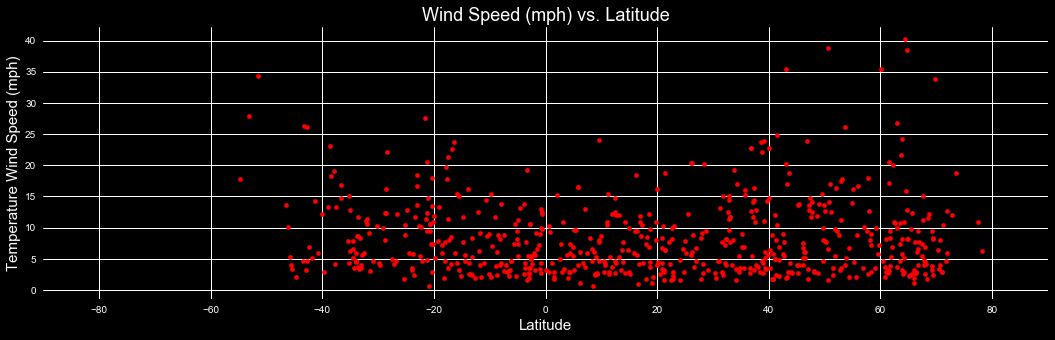

In [26]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Wind Speed (mph)'],color = 'red',s=20);
plt.xlim(-90,90)
plt.title('Wind Speed (mph) vs. Latitude',fontsize=(18));
plt.ylabel('Temperature Wind Speed (mph)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

In [27]:
print("The average wind speed is {} mph for all randomly selected cities".format(df_countries['Wind Speed (mph)'].mean()))

The average wind speed is 8.35529318541997 mph for all randomly selected cities


<h3><u>Conclusion</u></h3>
<p>While using the  Openweathermap API to determine the weather for 500+ cities around the world, I noticed a few different insights. The insights are below:</p>
<h4><u>Insights</u></h4>
<ul>
<li>In the Temperature vs. Latitude scatter plot, as the latitude increases the temperature increases.</li> 
<p><li>In the Wind Speed (mph) vs. Latitude scatter plot, the average when speed for all cities is fairly low.  </li><br>
<li>The wind speeds are higher on average at the north and south poles.</li>
</ul>